In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('../dataset/commerce_sales_data.csv')

In [13]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [15]:
df.describe()

,Age,Unit Price,Quantity,Total Price,Shipping Fee
count,900.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.695556,457.703777,3.008000,1346.600000,12.416390
std,15.011400,537.231434,1.404246,1834.037877,4.412185
min,18.000000,30.000000,1.000000,30.000000,5.000000
25%,35.000000,50.000000,2.000000,200.000000,8.560000
50%,49.000000,200.000000,3.000000,600.000000,12.315000
75%,59.000000,800.000000,4.000000,1500.000000,16.075000
max,69.000000,3109.560612,5.000000,7500.000000,19.980000


#### Data Quality Check

In [6]:
df.isnull().sum()

Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(901, 12)

In [20]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,46.695556,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.000000,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.000000,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.000000,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,46.695556,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [21]:
df.tail()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
994,CUST0079,Male,West,26.000000,Smartwatch,Wearables,200.0,2,400,7.14,Returned,2023-01-04
995,CUST0201,Female,South,49.000000,Headphones,Accessories,100.0,1,100,17.21,In Transit,2023-01-05
996,CUST0133,Male,East,47.000000,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,2023-04-01
997,CUST0055,Female,North,46.695556,Mouse,Accessories,30.0,5,150,19.35,Delivered,2023-10-20
998,CUST0023,Female,South,29.000000,Laptop,Electronics,1500.0,5,7500,10.36,Returned,2023-01-07


In [22]:
df['Age'] = df['Age'].astype(int)

In [23]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)

IQR = q3 - q1

upper = q3 +( 1.5*IQR )
lower = q1 - (1.5*IQR)
outlier = (df['Age'] < upper) | (df['Age'] > lower)
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"IQR: {IQR}")

print(f"Upper Quartile : {upper}")
print(f"Lower Quartile: {lower}")
print(f"Total Outlier: {outlier}")


Q1: 37.0
Q2: 46.0
Q3: 58.0
IQR: 21.0
Upper Quartile : 89.5
Lower Quartile: 5.5
Total Outlier: 0      True
1      True
2      True
3      True
4      True
       ... 
994    True
995    True
996    True
997    True
998    True
Name: Age, Length: 901, dtype: bool


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [71]:
import calendar
df['month'] = df['Order Date'].dt.month
sorted_month =df['month'].sort_values().unique()
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [72]:
df

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date,month
0,CUST0268,Male,North,46,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08,December
1,CUST0046,Male,West,22,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09,April
2,CUST0169,Female,South,54,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28,August
3,CUST0002,Male,North,23,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18,January
4,CUST0173,Female,South,46,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,CUST0079,Male,West,26,Smartwatch,Wearables,200.0,2,400,7.14,Returned,2023-01-04,January
995,CUST0201,Female,South,49,Headphones,Accessories,100.0,1,100,17.21,In Transit,2023-01-05,January
996,CUST0133,Male,East,47,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,2023-04-01,April
997,CUST0055,Female,North,46,Mouse,Accessories,30.0,5,150,19.35,Delivered,2023-10-20,October


### Correlation Analysis

In [27]:
correlation = df[['Unit Price',	'Quantity',	'Total Price' ]].corr()
correlation

,Unit Price,Quantity,Total Price
Unit Price,1.000000,-0.012056,0.823107
Quantity,-0.012056,1.000000,0.349285
Total Price,0.823107,0.349285,1.000000


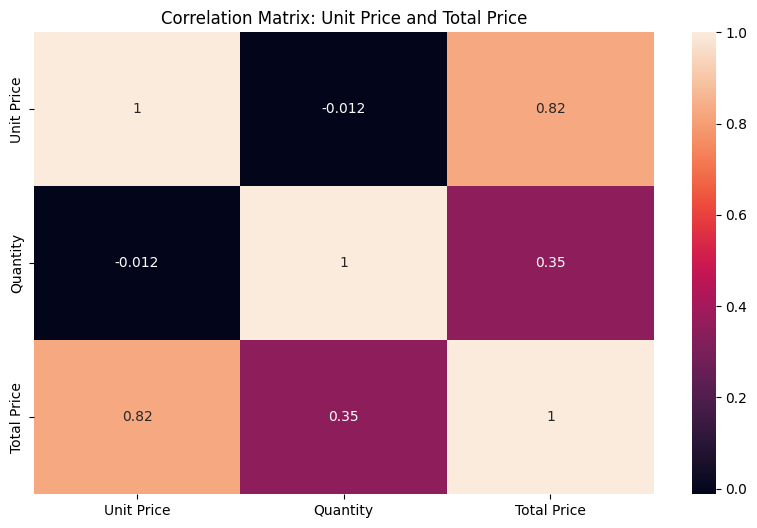

In [28]:
plt.figure(figsize=(10,6))

sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix: Unit Price and Total Price')
plt.show()

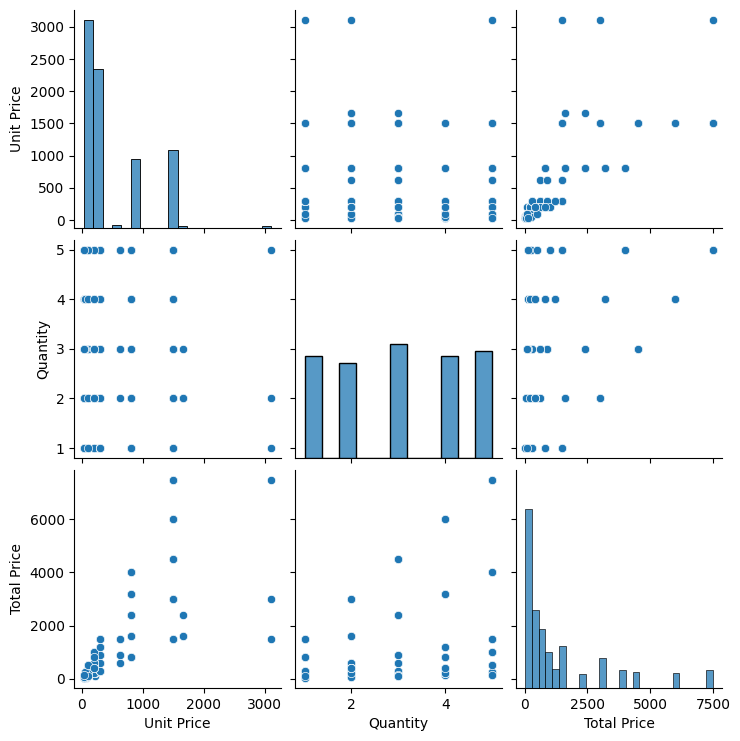

In [29]:
sns.pairplot(df[['Unit Price',	'Quantity',	'Total Price' ]])

#### Univariate Analysis

In [34]:
region = df.Region.value_counts()
category = df.Category.value_counts()
gender = df['Gender'].value_counts()

print(region)
print(category)
print(gender)


Region
West     238
South    233
East     217
North    213
Name: count, dtype: int64
Category
Electronics    429
Accessories    362
Wearables      110
Name: count, dtype: int64
Gender
Male      473
Female    428
Name: count, dtype: int64


<Axes: xlabel='Gender'>

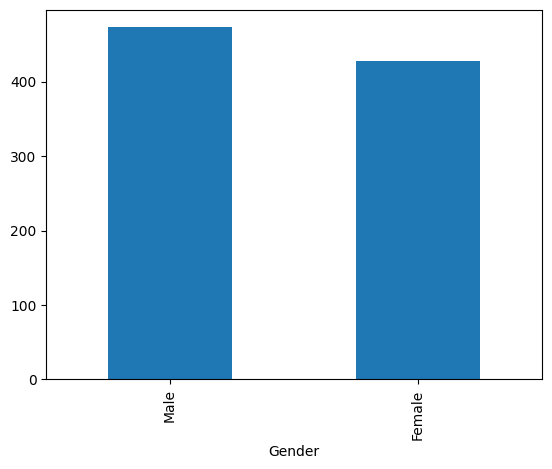

In [93]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Sales Distribution By Region'}, xlabel='Region', ylabel='Frequency'>

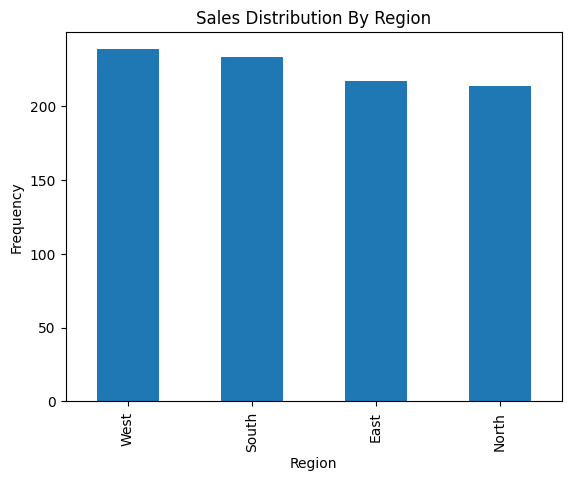

In [34]:
region.plot(kind='bar', xlabel='Region', ylabel='Frequency', title='Sales Distribution By Region' )

In [ ]:
# Total sales in a given region

region_sales = df.groupby(by=['Region'])['Total Price'].sum()
region_sales.sort_values(ascending=False)

Region
East     317390
West     308530
South    293110
North    286320
Name: Total Price, dtype: int64

##### Multivariate Analysis

<Axes: title={'center': 'Total Sales By Region'}, xlabel='Region', ylabel='Total Sales'>

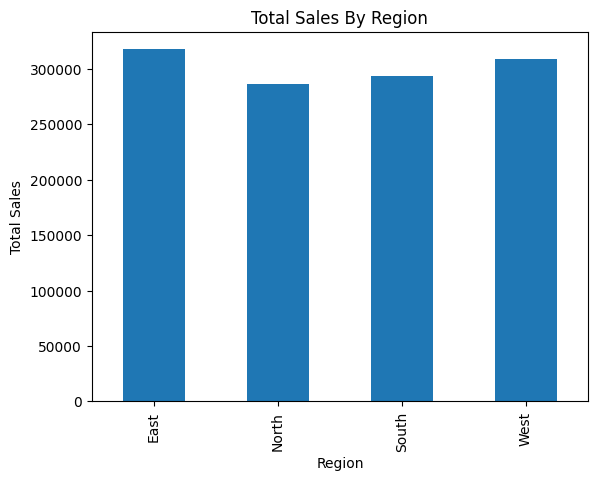

In [51]:
region_sales.plot(kind='bar', xlabel='Region', ylabel='Total Sales', title='Total Sales By Region')

<Axes: title={'center': 'Total sales in each Month'}, xlabel='month', ylabel='Total Sales'>

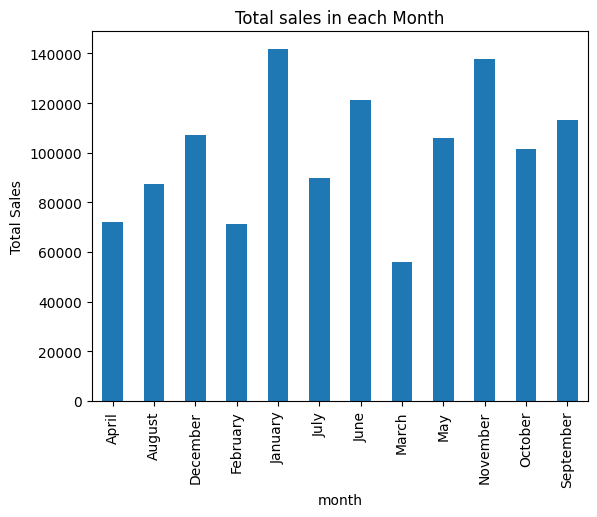

In [81]:
monthly_sales = df.groupby(by='month')['Total Price'].sum()

monthly_sales.plot(kind='bar', ylabel='Total Sales',title='Total sales in each Month')

<Axes: title={'center': 'Total Sales by Gender'}, xlabel='Gender', ylabel='Total Sales'>

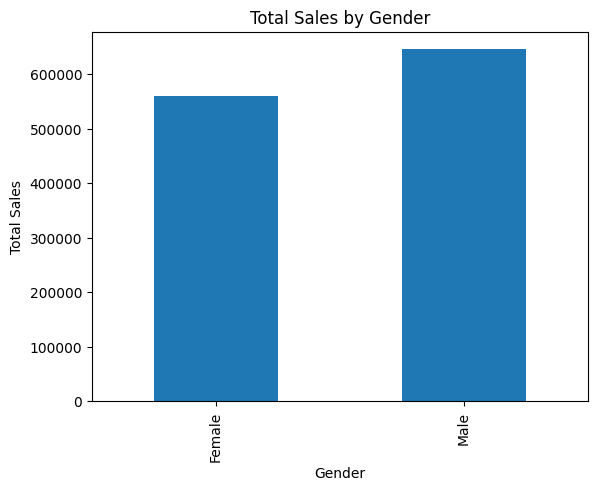

In [97]:
sales_by_gender = df.groupby(by='Gender')['Total Price'].sum()

sales_by_gender.plot(kind='bar', ylabel='Total Sales', title='Total Sales by Gender')

Text(0, 0.5, 'Frequency')

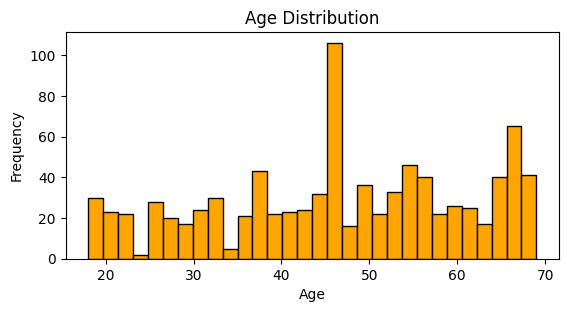

In [89]:
# Histogram for GHI, DHI, and WS
plt.figure(figsize=(14, 10))

# Age Histogram
plt.subplot(3, 2, 1)
plt.hist(df['Age'], bins=30, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


<Axes: title={'center': 'Sales Distribution By Category'}, xlabel='Item Category', ylabel='Frequency'>

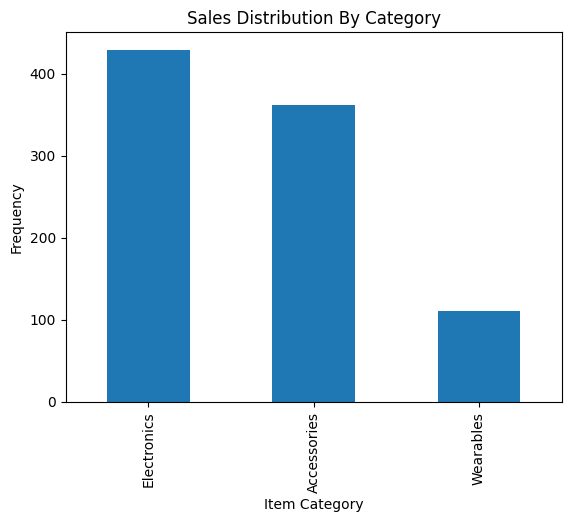

In [35]:
category.plot(kind='bar', xlabel='Item Category', ylabel='Frequency', title='Sales Distribution By Category' )

<Axes: title={'center': 'Sales Distribution By Gender'}, xlabel='Gender', ylabel='Frequency'>

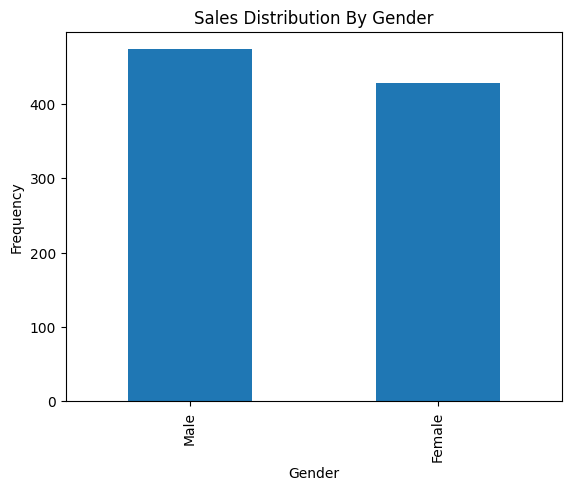

In [32]:
gender.plot(kind='bar', xlabel='Gender', ylabel='Frequency', title='Sales Distribution By Gender' )